# Michele Banfi 869294 - EX 00

The exercise consists of a quantum circuit in which is present a "black box"; the black box apply some CNOTs, the target of the black box is an ancilla qubit. The aim of the exercise is guess which are the qubit acting as the controller qubit inside CNOTs.

In [1]:
# import libraries
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import circuit_drawer
import numpy as np

A black box function is used. It randomly applies some CNOTs with the ancilla as the target qubit.

In [2]:
# black box
def blackBox():
    
    # an array to store the indices:
    indices = []
    
    for i in range(4):
        
        # generate a random number between 0 and 1 = 50% of adding a CNOT   
        random = np.random.randint(2)
        if random == 1:
            indices.append(i)
    
    return indices

A classical approach and a quantum approach are used to solve the exercise.

# Classical

For the classical approach, first compute the permutations (with only one qubit = $\left|1 \right\rangle$ at a time), cycle trhough all of them; then observe the outputs of the ancilla throughout the permutations to guess which qubits are controlling CNOTs.

In [3]:
# store the permutatutions
permutations = []

# calculate the permutations of the inputs except the last qubit
for i in range(4):
    
    # store the configuration
    configuration = []
    for j in range(4):
        if i != j:
            configuration.append(0)
        else:
            configuration.append(1)
    permutations.append(configuration)

print(permutations)

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


In [4]:
# save the results to inspect them afterward
results = []
indices = blackBox()

# cycle through the permutations
for i in range(len(permutations)):
    
    classical_input = permutations[i]
    
    qc = QuantumCircuit(5)
    
    # encode the state
    for i, val in enumerate(classical_input):
        if val == 1:
            qc.x(i)
    
    # black box
    for i in indices:
        qc.cx(i, 4)
    
    # measure the circuit
    qc.measure_all()
    
    # run the circuit
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()

    # save the results to inspect them later
    results.append(co)


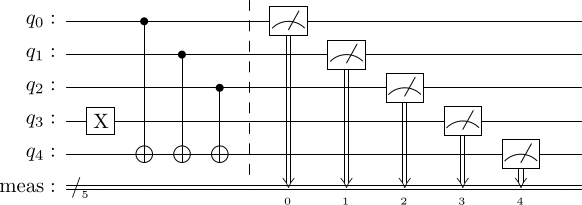

In [5]:
# display the circuit to showcase how it works
circuit_drawer(qc, output='latex')

In [6]:
# cycle through the results 
for i in range(len(results)):
    result = list(results[i].keys())[0]
    
    # check that the string at position 0 is 1, which is the ancilla; meaning that there was a CNOT using the qubit as a control over the ancilla
    if result[0] == '1':
        print(f"The circuit had a CNOT at position {i}")

The circuit had a CNOT at position 0
The circuit had a CNOT at position 1
The circuit had a CNOT at position 2


# Quantum

Now the quantum version

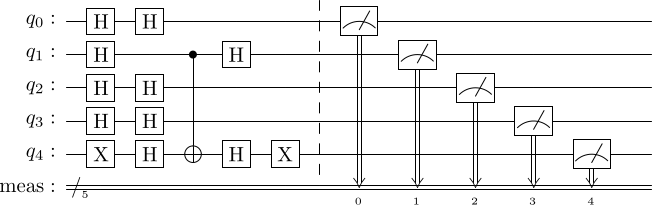

In [7]:
# initialize the circuit
qc = QuantumCircuit(5)

# put the ancilla in state |1> that will become |-> after the Hadamard
qc.x(4)

qc.barrier()

# prepare the state |+>
for i in range(5):
    qc.h(i)
    
qc.barrier()

# black box
indices = blackBox()
for i in indices:
    qc.cx(i, 4)
    
qc.barrier()

# put back in computational basis
for i in range(5):
    qc.h(i)
    
qc.barrier()
    
# put back the ancilla in state |0>
qc.x(4)

qc.measure_all()

circuit_drawer(qc, output='latex')

In [8]:
# run the circuit and get the results
result = Sampler().run([qc], shots=10).result()[0]
co = result.data.meas.get_counts()

# take the result key 
result = list(co.keys())[0]

for i in range (len(result)):
    if result[4-i] == '1':
        print(f"The circuit had a CNOT at position {i}")

The circuit had a CNOT at position 1
